# Seven wonders analysis

## Libraries and data

https://github.com/arruda/bgarena_analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.ensemble import RandomForestClassifier

In [2]:
from pdpbox import pdp, get_dataset, info_plots

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
xls = pd.ExcelFile('seven_wonders.xlsx')
df = pd.read_excel(xls, 'transpose')

In [5]:
vp_cols = ['VP from Treasury Contents','VP from Wonder','VP from Civilian Structures','VP from Scientific Structures','VP from Commercial Structures','VP from Guilds']

In [6]:
print('Game records = {}'.format(len(df['Board'].unique())))

Game records = 130


## Data processing

In [7]:
df['Ranking'] = df['Game result'].apply(lambda x: int(x[0]))
df['final_score'] = df['Game result'].apply(lambda x: int(re.search(r'\((.*?)\)',x).group(1)))
df['win_record'] = np.where(df['Ranking']==1,1,0)
df['VP_military'] = df['VP from Military Conflicts (Victory)'] + df['VP from Military Conflicts (Defeat)']
df['max_one_strategy'] = df[vp_cols].max(axis=1)
df['min_one_strategy'] = df[vp_cols].min(axis=1)
df['std_one_strategy'] = df[vp_cols].std(axis=1)
df['main_strategy'] = df[vp_cols].idxmax(axis=1)
df['min_strategy'] = df[vp_cols].idxmin(axis=1)

In [8]:
player_count = df[['Board', 'win_record']].groupby('Board').count().reset_index()
player_count.columns = ['Board', 'player_count']
df = df.merge(player_count, how='left', on='Board')

In [9]:
# Manual map of wonders

wonders = {'Wonder ID': list(range(1,15)), 
       'wonder_name': ['Gizah A', 'Babylon A', 'Olympia A', 'Rhodes A', 'Ephesos A', 'Alexandria A', 'Halikarnassos A',\
                      'Gizah B', 'Babylon B', 'Olympia B', 'Rhodes B', 'Ephesos B', 'Alexandria B', 'Halikarnassos B']}

wonders_map = pd.DataFrame(data = wonders)
df = df.merge(wonders_map, on='Wonder ID')

## EDA

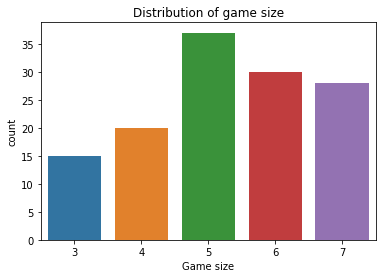

In [10]:
# Number of players

game_size = df[['Board','Wonder ID']].groupby('Board').count()
game_size.columns = ['Game size']
ax = sns.countplot(data=game_size, x='Game size')
ax.title.set_text('Distribution of game size')

Mean score: 49.785714285714285


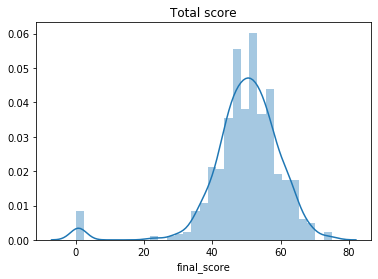

In [11]:
print('Mean score: {}'.format(df['final_score'].mean()))
ax = sns.distplot(df['final_score'])
ax.title.set_text('Total score')

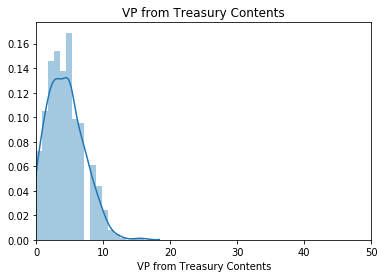

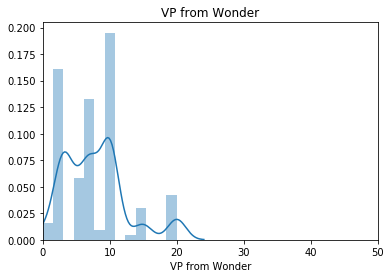

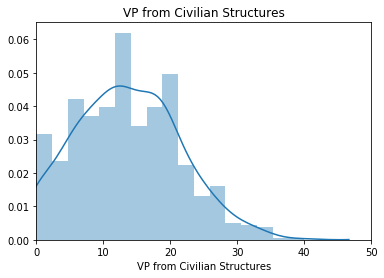

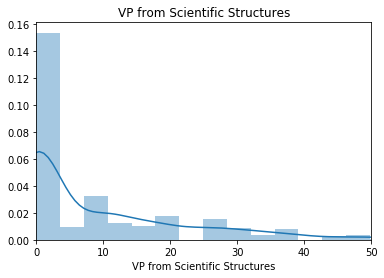

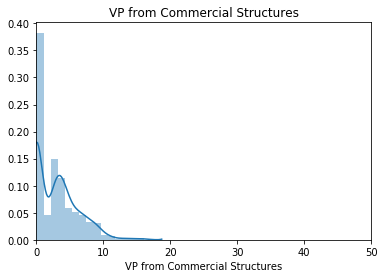

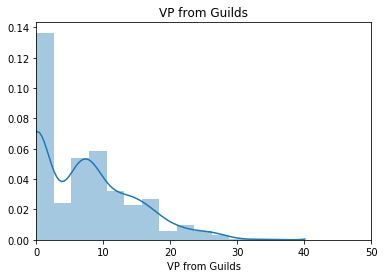

In [12]:
for a in vp_cols:
    ax = sns.distplot(df[a])
    ax.title.set_text(a)
    ax.set(xlim=(0, 50))
    plt.show()

In [13]:
df[['wonder_name', 'Wonder ID', 'final_score', 'win_record']].groupby(['Wonder ID','wonder_name']).agg(['mean', 'count']).sort_values(by=('win_record','mean'), ascending=False)

final_score       win_record      
                                 mean count       mean count
Wonder ID wonder_name                                       
13        Alexandria B      52.037975    79   0.278481    79
1         Gizah A           52.000000    36   0.250000    36
3         Olympia A         49.567568    37   0.243243    37
14        Halikarnassos B   50.805970    67   0.238806    67
8         Gizah B           48.775862    58   0.224138    58
12        Ephesos B         50.576471    85   0.223529    85
4         Rhodes A          48.937500    32   0.218750    32
10        Olympia B         50.592593    54   0.203704    54
11        Rhodes B          51.013158    76   0.171053    76
9         Babylon B         47.131148    61   0.163934    61
6         Alexandria A      47.714286    21   0.142857    21
2         Babylon A         48.303030    33   0.121212    33
7         Halikarnassos A   45.666667    27   0.074074    27
5         Ephesos A         46.250000    20   0.050000    20

In [14]:
vp_cols = list(df.columns[df.columns.str.contains("VP")]) +['wonder_name']
df[vp_cols].groupby('wonder_name').mean()

,VP from Military Conflicts (Victory),VP from Military Conflicts (Defeat),VP from Treasury Contents,VP from Wonder,VP from Civilian Structures,VP from Scientific Structures,VP from Commercial Structures,VP from Guilds,VP_military
wonder_name,,,,,,,,,
Alexandria A,7.809524,-2.476190,4.142857,8.047619,13.190476,7.523810,2.904762,9.380952,5.333333
Alexandria B,9.126582,-2.063291,4.278481,6.468354,16.126582,7.949367,2.379747,8.075949,7.063291
Babylon A,3.484848,-3.787879,3.030303,6.939394,9.151515,23.757576,2.121212,3.606061,-0.303030
Babylon B,4.852459,-3.377049,4.245902,3.000000,11.950820,15.770492,4.918033,7.442623,1.475410
Ephesos A,6.050000,-3.300000,5.300000,9.150000,14.850000,7.750000,2.350000,4.100000,2.750000
Ephesos B,6.070588,-2.882353,5.247059,9.247059,13.435294,12.058824,2.305882,6.023529,3.188235
Gizah A,8.666667,-2.361111,3.888889,14.000000,15.277778,2.888889,3.277778,6.361111,6.305556
Gizah B,7.413793,-2.775862,4.413793,17.655172,12.344828,1.568966,4.120690,6.396552,4.637931
Halikarnassos A,7.592593,-2.222222,3.888889,8.962963,12.481481,9.777778,3.296296,4.000000,5.370370


In [15]:
# Main general strategies

summary = df[['wonder_name', 'main_strategy','win_record']].groupby(['wonder_name', 'main_strategy']).count().reset_index()
summary.pivot(index='wonder_name', columns='main_strategy', values='win_record')

main_strategy,VP from Civilian Structures,VP from Commercial Structures,VP from Guilds,VP from Scientific Structures,VP from Treasury Contents,VP from Wonder
wonder_name,,,,,,
Alexandria A,13.0,NaN,4.0,3.0,NaN,1.0
Alexandria B,44.0,NaN,15.0,19.0,NaN,1.0
Babylon A,6.0,NaN,1.0,23.0,NaN,3.0
Babylon B,21.0,2.0,8.0,28.0,2.0,NaN
Ephesos A,12.0,NaN,1.0,6.0,NaN,1.0
Ephesos B,38.0,NaN,11.0,27.0,3.0,6.0
Gizah A,21.0,NaN,5.0,3.0,NaN,7.0
Gizah B,10.0,NaN,4.0,3.0,NaN,41.0
Halikarnassos A,14.0,NaN,2.0,9.0,NaN,2.0


In [16]:
# Main winning strategies

summary = df[['wonder_name', 'main_strategy','win_record']][df.win_record == 1].groupby(['wonder_name', 'main_strategy']).count().reset_index()
summary.pivot(index='wonder_name', columns='main_strategy', values='win_record')

main_strategy,VP from Civilian Structures,VP from Guilds,VP from Scientific Structures,VP from Treasury Contents,VP from Wonder
wonder_name,,,,,
Alexandria A,1.0,1.0,1.0,NaN,NaN
Alexandria B,12.0,6.0,3.0,NaN,1.0
Babylon A,NaN,NaN,4.0,NaN,NaN
Babylon B,1.0,2.0,6.0,1.0,NaN
Ephesos A,NaN,NaN,1.0,NaN,NaN
Ephesos B,9.0,4.0,5.0,1.0,NaN
Gizah A,4.0,2.0,1.0,NaN,2.0
Gizah B,3.0,1.0,NaN,NaN,9.0
Halikarnassos A,1.0,NaN,1.0,NaN,NaN


## Simple predictive model

In [17]:
# Order by boards to avoid train/test split within games
df.sort_values(by='Board', inplace=True)

df_train = df.iloc[0:400,:][['Board','Wonder ID', 'player_count']].reset_index(drop=True)
df_test = df.iloc[400:,:][['Board','Wonder ID', 'player_count']].reset_index(drop=True)

y_train = df.iloc[0:400,:][['win_record']].reset_index(drop=True)
y_test = df.iloc[400:,:][['win_record']].reset_index(drop=True)

In [18]:
model = RandomForestClassifier()
model.fit(df_train, y_train)
model.score(df_test, y_test)

0.6748251748251748

In [19]:
# Ouput predictions

df_pred = pd.DataFrame(model.predict_proba(df_train))
results = pd.concat([df_train, df_pred], axis=1)
results = results.merge(wonders_map, on='Wonder ID')

In [20]:
results[['wonder_name',1]].groupby('wonder_name').mean().sort_values(by=1, ascending=False)

,1
wonder_name,
Halikarnassos B,0.284211
Alexandria B,0.259524
Ephesos B,0.230435
Rhodes A,0.220000
Gizah B,0.220000
Rhodes B,0.213889
Gizah A,0.213636
Olympia B,0.180645
Halikarnassos A,0.166667


In [21]:
wonders_map

,Wonder ID,wonder_name
0,1,Gizah A
1,2,Babylon A
2,3,Olympia A
3,4,Rhodes A
4,5,Ephesos A
5,6,Alexandria A
6,7,Halikarnassos A
7,8,Gizah B
8,9,Babylon B
9,10,Olympia B


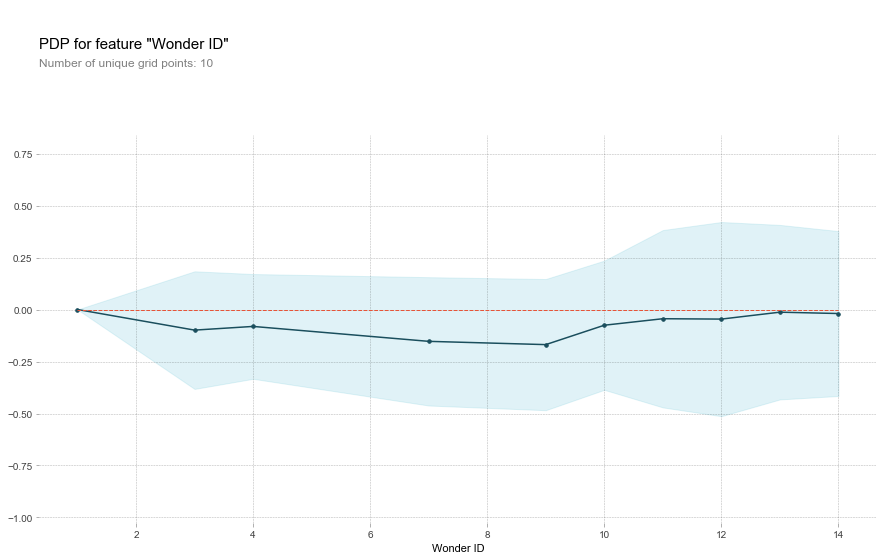

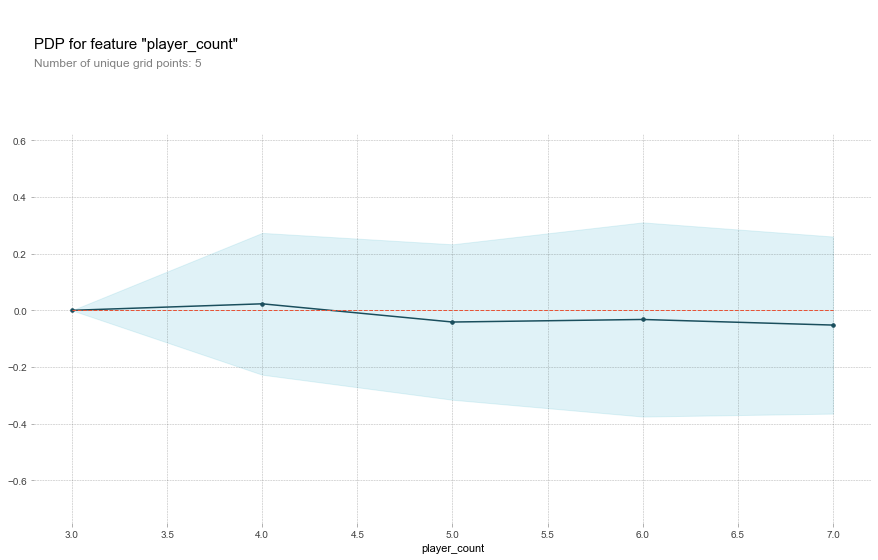

In [22]:
# Partial dependence plots

for test_feature in ['Wonder ID', 'player_count']:
    pdp_success = pdp.pdp_isolate(model=model, dataset=df_train, model_features=df_train.columns, feature=test_feature)
    pdp.pdp_plot(pdp_success, test_feature)
  #pdp.info_plots.target_plot(pdp_success, test_feature)
    plt.show()